In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
from pathlib import Path
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import sys
import os
import logging
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D      

In [2]:
sns.set_style("whitegrid")

In [3]:
# Path to load mainDF from
load_path = '/Volumes/Britt_SSD/ReDoEvals3/comboEval.parquet'
# Path to save visuals
save_path = '/Users/byrdsmyth/iCloud/Documents/School/Thesis/Stimuli/'
# Set printed output or not
verbose = False
# Set to save figures or not
saveFigs = True
# Set figuresize
FS = (15,7)
# list of actions
action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# coord for legends
fakexy = (0, 0)

In [4]:
allEvalsDF = pd.read_parquet(load_path)

In [5]:
# Generate list of agents in order
evalAgents = allEvalsDF.agentNum.unique()

# conds = [allEvalsDF['agent']=='pop700',allEvalsDF['agent']=='pop23',allEvalsDF['agent']=='fear2', \
#          allEvalsDF['agent']=='fear18',allEvalsDF['agent']=='nml3', allEvalsDF['agent']=='nml21',  \
#          allEvalsDF['agent']=='std300', allEvalsDF['agent']=='std2', allEvalsDF['agent']=='std23', \
#          allEvalsDF['agent']=='std232']

conds = [allEvalsDF['agent']=='PowerPill_700k',allEvalsDF['agent']=='PowerPill_23M',allEvalsDF['agent']=='FearGhosts_2M', \
         allEvalsDF['agent']=='FearGhosts_18M',allEvalsDF['agent']=='Dots_3M', allEvalsDF['agent']=='Dots_21M',  \
         allEvalsDF['agent']=='Standard_300k', allEvalsDF['agent']=='Standard_2M', allEvalsDF['agent']=='Standard_23_run1', \
         allEvalsDF['agent']=='Standard_23_run2']

choices = ["PowerPill_700k","PowerPill_23M","AvoidGhosts_2M","AvoidGhosts_18M", "Dots_3M", \
           "Dots_21M", "Standard_300k", "Standard_2M", "Standard_23M_run1", "Standard_23M_run2"]

allEvalsDF['agent'] = np.select(conds, choices)

print(allEvalsDF.agent.unique())
names = allEvalsDF.agent.unique()

# temp = allEvalsDF[allEvalsDF['agentNum']==2]
# names = []
# for i in allEvalsDF.agent.unique():
#     nm = i.agent.unique()[0]
#     print(nm)
#     if (nm=='pop700'):
#         i['agent'] = "power pill 700k"
#     if (nm=='pop23'):
#         i['agent'] = "power pill 23M"
#     if (nm=='fear2'):
#         i['agent'] = "fear ghosts 2M"
#     if (nm=='fear18'):
#         i['agent'] = "fear ghosts 18M"
#     if (nm=='nml3'):
#         i['agent'] = "dots 3M"
#     if (nm=='nml21'):
#         i['agent'] = "dots 21M"
#     if (nm=='std300'):
#         i['agent'] = "standard 300k"
#     if (nm=='std2'):
#         i['agent'] = "standard 2M"
#     if (nm=='std23'):
#         i['agent'] = "standard 23, run 1"
#     if (nm=='std232'):
#         i['agent'] = "standard 23, run 2"
#     names.append(str(i.agent.unique()))

['PowerPill_700k' 'PowerPill_23M' 'AvoidGhosts_2M' 'AvoidGhosts_18M'
 'Dots_3M' 'Dots_21M' 'Standard_300k' 'Standard_2M' 'Standard_23M_run1'
 'Standard_23M_run2']


In [6]:
# Df for each Agent Evaluation
evalDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = allEvalsDF[allEvalsDF['agent'] == agent]
    evalDFsList.append(temp)
    

In [7]:
# Df for each Agent Evaluation Key States
evalKeysDFsList = []

for index, agent in enumerate(allEvalsDF.agent.unique()):
    temp = evalDFsList[index]
    temp2 = temp[temp['keyNum'] > 0]
    evalKeysDFsList.append(temp2)


In [8]:
#change names
# 'pop700' 'pop23' 'fear2' 'fear18' 'nml3' 'nml21' 'std300' 'std2' 'std23' 'std232'


In [ ]:
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     df = allEvalsDF[allEvalsDF['agentNum']== aNum]
    
#     plt.scatter("state", "mean_reward", data=df, alpha=0.7, label=evalAgents[index])
#     plt.xlabel("state")
#     plt.ylabel("mean_reward")
#     plt.title(evalAgents[index])
#     plt.legend(loc="lower center", ncol = 5, bbox_to_anchor=(0.5, -0.29), fontsize=9)
# if saveFigs:
#     filename = "mean_reward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()
    
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     df = allEvalsDF[allEvalsDF['agentNum']== aNum]
    
#     plt.scatter("state", "episode_step", data=df, alpha=0.7, label=evalAgents[index])
#     plt.xlabel("state")
#     plt.ylabel("episode_step")
#     plt.title(evalAgents[index])
#     plt.legend(loc="lower center", ncol = 5, bbox_to_anchor=(0.5, -0.29), fontsize=9)
# if saveFigs:
#     filename = "stateVstep.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()
    
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     df = allEvalsDF[allEvalsDF['agentNum']== aNum]
    
#     plt.scatter("state", "episode_reward", data=df, alpha=0.7, label=evalAgents[index])
#     plt.xlabel("state")
#     plt.ylabel("epoch_step")
#     plt.title(evalAgents[index])
#     plt.legend(loc="lower center", ncol = 5, bbox_to_anchor=(0.5, -0.29), fontsize=9)
# if saveFigs:
#     filename = "stateVreward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# for index, df in enumerate(evalDFsList):
#     agent = df
#     plt.figure(figsize=FS)
#     plt.scatter("state", "diff_to_orange", data=agent, c="orange", alpha=0.9)
#     plt.scatter("state", "diff_to_red", data=agent, c="r", alpha=0.7)
#     plt.scatter("state", "diff_to_pink", data=agent, c="green", alpha=0.5)
#     plt.scatter("state", "diff_to_blue", data=agent, c="b", alpha=0.2)

#     tmp = evalKeysDFsList[index]
#     plt.vlines("state",ymin=-280,ymax=200,data=tmp,color='g',alpha=0.12)

#     plt.xlabel("Time Step")
#     plt.ylabel("Change in Distance")
#     plt.title("Change in Distance to Each Ghost for " + names[index] + " with Key States in Green")
#     if saveFigs:
#         filename = names[index] + "_GhostDistance_WithKeyStates.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# plt.style.use('ggplot')
# threshold = 50
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey']
# colors2 = ['slategrey','dodgerblue','yellow','orange','red','green']
# for index, df in enumerate(evalDFsList):
#     plt.figure(figsize=FS)
#     agent = df
#     plt.scatter("state", "diff_to_orange", data=agent, c="orange", alpha=0.9)
#     plt.scatter("state", "diff_to_red", data=agent, c="r", alpha=0.7)
#     plt.scatter("state", "diff_to_pink", data=agent, c="green", alpha=0.5)
#     plt.scatter("state", "diff_to_blue", data=agent, c="b", alpha=0.2)
#     print(agent.agent.unique())
#     temp = agent.query('reward > 10 & reward < 200')
#     for i in range(0, len(temp)):
#         plt.axvline(x=list(temp['state'])[i], lw=3.75, alpha=0.75, c="gold")

#     plt.xlabel('Time Step', fontsize=11)
#     plt.ylabel('Distance', fontsize=11)
#     plt.xlim((0,10000))
#     plt.ylim((-235,150))
#     plt.title(names[index] + ' Distance to Ghosts', fontsize=11)
#     plt.tight_layout()

#     if saveFigs:
#         filename = names[index] + "GhostDistance_Summary.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# for index, agent in enumerate(evalKeysDFsList):
#     if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
#         for i in agent.keyNum.unique():
#             plt.subplot()
#             plt.plot("state", "reward", data = agent[agent['keyNum']==i], c='blue', linewidth=3, alpha = 0.9)
#             plt.plot("state", "lives", data = agent[agent['keyNum']==i], c='green', linewidth=10, alpha = 0.2)
#             plt.plot("state", "episode_reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
#             plt.plot("state", "epoch_reward", data = agent[agent['keyNum']==i], c='orange', linewidth=15, alpha = 0.2, label = 'rewards this game')
#             plt.title("Map of Key Situation " + str(i) + " " + names[index])
#             plt.xlabel('Frame Number')
#             plt.ylabel('Points')
#             plt.legend(loc="best")

#             if saveFigs:
#                 filename = names[index] + "SubwayMapSitch" + str(i) + ".png"
#                 filepath = os.path.join(save_path, filename)
#                 if not os.path.isdir(save_path):
#                     os.mkdir(save_path)
#                 plt.savefig(filepath, dpi=100, bbox_inches='tight')
#             plt.show()

In [ ]:
sns.set_style("whitegrid")



for index, agent in enumerate(evalKeysDFsList):
    fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(13,4), sharey=True)
    axes[0].set_ylabel('Points')
    for k_i, i in enumerate(agent.keyNum.unique()):
        color = 'tab:red'
        axes[k_i].plot("state", "episode_reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
        axes[k_i].plot("state", "epoch_reward", data = agent[agent['keyNum']==i], c='tomato', linewidth=15, alpha = 0.2, label = 'rewards this game')
        axes[k_i].scatter("state", "episode_reward", data = agent.loc[(agent['keyNum']==i) & (agent['reward']>0)], c='blue', linewidth=3, alpha = 0.9, label="points scored")
        n = agent['epoch_reward'].max()+20
        axes[k_i].set_ylim(-5,n)
        axes[k_i].set_yticks([0, n/8, 2*(n/8), 3*(n/8), 4*(n/8), 5*(n/8), 6*(n/8), 7*(n/8)])
        axes[k_i].tick_params(axis='y', labelcolor=color)
        axes[k_i].set_title("Key " + str(int(i)))
        axes[k_i].set_xlabel("Time Step")


        ax2 = axes[k_i].twinx() # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'

        ax2.plot("state", "lives", data = agent.loc[(agent['keyNum']==i)], c=color, linewidth=6, alpha = 0.86, linestyle=":")
        ax2.set_ylim(0,4)
        if k_i == 4:
            ax2.set_xlabel=None
#             ax2.set_xticklabels([])
            ax2.tick_params(axis='y', labelcolor=color)
            ax2.set_yticks([1,2,3])
#             ax2.set_ylabels(['1','2','3'])
            ax2.set_ylabel('Lives Remaining')
        else:
            ax2.set_xlabel=None
            ax2.set_yticklabels([])
            ax2.set_ylabel=None
#             ax2.set_xticklabels([])

    fig.suptitle("Key States Maps for agent " + names[index])
#         fig.legend()
    if saveFigs:
        filename = names[index] + "SubwayMapSitch_DualAxes" + str(i) + ".png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
cols=['r','r','g','g','b','b','y','y','b','r','m','m','lavender']

for index, agent in enumerate(evalKeysDFsList):
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(13,4), sharey=True)
        for agent_index,i in enumerate(agent.keyNum.unique()):
            tmp = agent[agent['keyNum']==i]
    #         temp = tmp[tmp['beforeLifeLoss']==True]
            tmp
            axes[agent_index].plot("state", "action", data = tmp, marker='o', c=cols[index])
    #         plt.xticks(agent[agent['keyNum']==i]['state'], [1,2,3,4,5,"Dead"])
            axes[agent_index].set_title("Key " + str(agent_index+1))
            axes[agent_index].set_xlabel("Time Step")
        plt.yticks([1,2,3,4], action_names)
        plt.suptitle(names[index] +"'s Actions in Key Situations")
        plt.tight_layout()
        fig.suptitle("Actions Taken in Key States for Agent " + names[index])
    #         fig.legend()
        if saveFigs:
            filename = "ActionsLineGraph_KeyStates_" + str(names[index]) + ".png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()


In [ ]:
sns.set_style("whitegrid")
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta',
         'red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green',
          'magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
for index, agentDF in enumerate(evalDFsList):
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        plt.figure(figsize=(3.2, 5))
        agent = agentDF
        agent['neg_y'] = agent['pacman_coord_y']*(-1)
        plt.scatter("pacman_coord_x", "neg_y", alpha=0.07, data=agent, c= colors[index],  label ="")
        plt.xlabel('x-coordinate', fontsize=11)
        plt.ylabel('y-coordinate', fontsize=11)
        plt.title(names[index] + ' Ms. Pacman Location', fontsize=11)
        plt.tight_layout()
        if saveFigs:
            filename = names[index] + "PacmanMovementMap_OG_Summary.png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']

rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    axs[index].scatter("epoch","epoch_step",c="coral",s=1,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = colors2[indexR]
        rew = rewards[indexR]
        axs[index].scatter("epoch","epoch_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    axs[index].set_xlabel('Game Number', fontsize=11)
    axs[0].set_ylabel('Game Step', fontsize=11)
    axs[1].set_ylabel('Game Step', fontsize=11)
    axs[index].set_title(names[index] + ' Reward Distribution', fontsize=11)
    column = agent["epoch_step"]
#     axs[index].set_ylim(0,column.max()+10)
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
    
plt.tight_layout()

if saveFigs:
    filename = "All_PacmanPointsOG_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["dot", "powerPill", "bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c="coral",s=3,alpha=0.5,data=agent[agent['reward']<10], label ="")
    temp = agent[agent['reward']>=10]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = colors2[indexR]
        rew = rewards[indexR]
        plt.scatter("epoch","epoch_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=11)
    plt.ylabel('Game Step', fontsize=11)
    plt.title(names[index] + ' Reward Distribution', fontsize=11)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

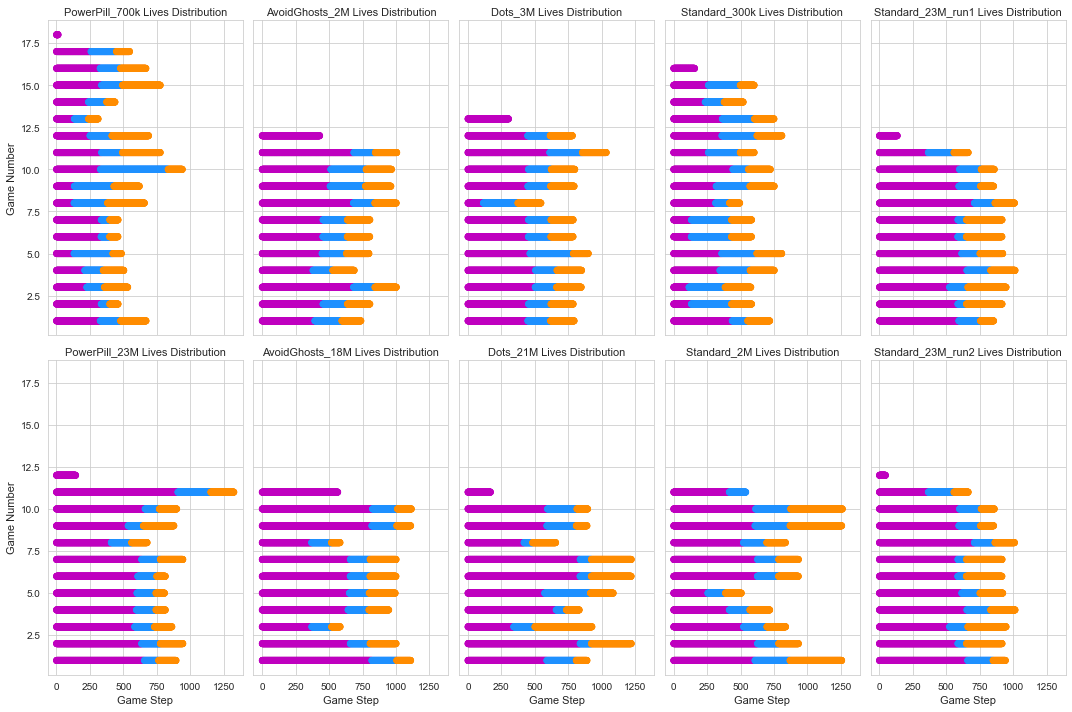

In [9]:
# Bars by lives
#herehere
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
axs = axes.T.flatten()
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    axs[index].scatter("epoch_step","epoch",c='lives',cmap=my_cmap,data=agent, label ="")
    axs[0].set_ylabel('Game Number', fontsize=11)
    axs[1].set_ylabel('Game Number', fontsize=11)
    axs[1].set_xlabel('Game Step', fontsize=11)
    axs[3].set_xlabel('Game Step', fontsize=11)
    axs[5].set_xlabel('Game Step', fontsize=11)
    axs[7].set_xlabel('Game Step', fontsize=11)
    axs[9].set_xlabel('Game Step', fontsize=11)
    axs[index].set_title(names[index] + ' Lives Distribution', fontsize=11)
    column = agent["epoch_step"]
#     axs[index].set_xlim(0,column.max()+10)
    
plt.tight_layout()

if saveFigs:
    filename = names[index] + "PacmanLivesBars_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
def Reverse(lst):
    return [ele for ele in reversed(lst)]
plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
    temp = agent[agent['reward']>50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = colors2[indexR]
        rew = rewards[indexR]
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    temp = agent[agent['reward']==50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=11)
    plt.ylabel('Game Step', fontsize=11)
    plt.title(names[index] + ' Reward Distribution', fontsize=11)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPointsOG_Summary_Lives.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        plt.figure(figsize=(4,8))
        agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
        plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
        temp = agent[agent['reward']>50]
        for indexR, rewAmnt in enumerate(temp.reward.unique()):
            col = colors2[indexR]
            rew = rewards[indexR]
            plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        temp = agent[agent['reward']==50]
        for indexR, rewAmnt in enumerate(temp.reward.unique()):
            col = 'purple'
            rew = "PowerPill"
            plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
        plt.xlabel('Game Number', fontsize=11)
        plt.ylabel('Game Step', fontsize=11)
        plt.title(names[index] + ' Reward Distribution', fontsize=11)
        column = allEvalsDF["epoch_step"]
        plt.ylim(0,1050)

        plt.Line2D(fakexy, fakexy, linestyle='none', marker='X', markeredgecolor='none',ms = 10, markerfacecolor="r", alpha=1.00, label = "Key States")

        legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
            Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
            Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
            c]

        fig.legend(handles=legend_elements, bbox_to_anchor= (0.705, 0.01), ncol=4)

        plt.tight_layout()

        if saveFigs:
            filename = names[index] + "PacmanPointsOG_Summary_Lives.png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()

In [ ]:
colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta','red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
colors2 = ['slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green','magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
sns.set_style('darkgrid')
rewards = ["bigR", "bigR", "bigR", "bigR","bigR", "bigR", "bigR", "bigR"]
my_cmap = ListedColormap([ "m", "dodgerblue","darkorange"])
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    plt.figure(figsize=(4,8))
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    plt.scatter("epoch","epoch_step",c='lives',cmap=my_cmap,s=3,alpha=0.5,data=agent, label ="")
#     temp = agent[agent['reward']>50]
#     for indexR, rewAmnt in enumerate(temp.reward.unique()):
#         col = colors2[indexR]
#         rew = rewards[indexR]
#         plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    temp = agent[agent['reward']==50]
    for indexR, rewAmnt in enumerate(temp.reward.unique()):
        col = 'purple'
        rew = "PowerPill"
        plt.scatter("epoch","episode_step",s="reward",c=col,data=temp[temp['reward']==rewAmnt], alpha=0.65, label=rew)
    plt.xlabel('Game Number', fontsize=11)
    plt.ylabel('Game Step', fontsize=11)
    plt.title(names[index] + ' Reward Distribution', fontsize=11)
    column = allEvalsDF["epoch_step"]
    plt.ylim(0,column.max()+10)

    plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor='none',ms = 10, markerfacecolor="purple", alpha=1.00, label = "Key States")

    legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
        Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
        Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
        c]

    fig.legend(handles=legend_elements, bbox_to_anchor= (0.705, 0.01), ncol=4)

    
    plt.tight_layout()

    if saveFigs:
        filename = names[index] + "PacmanPowerPillConsumption.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Lives Left')
axs[3].set_xlabel('Lives Left')
axs[5].set_xlabel('Lives Left')
axs[7].set_xlabel('Lives Left')
axs[9].set_xlabel('Lives Left')
axs[0].set_ylabel('Key Situation Number')
axs[1].set_ylabel('Key Situation Number')
for index, agent in enumerate(evalKeysDFsList):
    axs[index].scatter("lives", "keyNum", s=55, c= 'b', data = agent)
    axs[index].scatter("lives", "keyNum", s=15, data = agent[agent['beforeLifeLoss']>0], color = "red")
    axs[index].set_yticks([1,2,3,4,5],)
    axs[index].set_xticks([1,2,3],['1','2','3'])
    axs[index].set_title(names[index])

fig.suptitle("Lives Left in Key Situations")


b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="b", markerfacecolor="b", alpha=1.00)
c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="b", markerfacecolor="r", alpha=1.00)


fig.legend([b,c], ["Key State", "Life Lost"], bbox_to_anchor= (0.58, .08), ncol=2, fontsize='small')

# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
if saveFigs:
    filename = "LiveVkeyStates.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Frame Number')
axs[3].set_xlabel('Frame Number')
axs[5].set_xlabel('Frame Number')
axs[7].set_xlabel('Frame Number')
axs[9].set_xlabel('Frame Number')
axs[0].set_ylabel('Total Rewards Earned')
axs[1].set_ylabel('Total Rewards Earned')
for index, agent in enumerate(evalKeysDFsList):
    axs[index].plot("state", "total_reward", data = evalDFsList[index], c='b', label = 'Total Reward')
    axs[index].scatter('state', 'total_reward', data = evalKeysDFsList[index], s=48, c='coral', label = 'Key Situation')
    axs[index].set_title(names[index])

fig.suptitle('Location of Key States in Evaluation Set')

b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markeredgecolor="coral", markerfacecolor="coral", alpha=1.00)

fig.legend([b], ["Key State"], bbox_to_anchor= (0.54, .94), fontsize='small')


if saveFigs:
    filename = "KeyStatesInTotalReward.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# Bars by lives

my_cmap = ListedColormap(["darkorange", "dodgerblue", "m"])
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharex=True, sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Game Step')
axs[3].set_xlabel('Game Step')
axs[5].set_xlabel('Game Step')
axs[7].set_xlabel('Game Step')
axs[9].set_xlabel('Game Step')
for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
    agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
    agent_key = agent[agent['key_state']==True]
    axs[index].scatter("epoch_step","epoch",c='lives',s=5,cmap=my_cmap,data=agent, label ="")
    axs[index].scatter("epoch_step","epoch",color='r',data=agent_key,marker='X',s=150,label ="Key States")
    axs[index].set_ylabel('Game Number', fontsize=11)
    axs[index].set_title(names[index] + ' Key States', fontsize=11)
    column = agent["epoch_step"]
#     axs[index].set_xlim(0,column.max()+10)

c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='X', markeredgecolor='none',ms = 10, markerfacecolor="r", alpha=1.00, label = "Key States")

legend_elements = [Patch(facecolor='m', edgecolor='m', label='3 Lives Left'), \
    Patch(facecolor='dodgerblue', edgecolor='dodgerblue', label='2 Lives Left'), \
    Patch(facecolor='darkorange', edgecolor='darkorange', label='1 Life Left'), \
    c]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.705, 0.01), ncol=4)
    
plt.tight_layout()

if saveFigs:
    filename = names[index] + "PacmanLivesBars_withKeys_Summary.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
if verbose: 
    for index, aNum in enumerate(allEvalsDF.agentNum.unique()):   
        temp = allEvalsDF[allEvalsDF['agentNum']==aNum]
        print("Temp: " + str(temp.agentNum.unique()))
        temp2 = temp[temp['keyNum']>0]
        print("Key States in Temp: " + str(temp2.keyNum.unique()))
        temp3 = temp2[temp2['beforeLifeLoss']==1]
        print(temp3["keyNum"])
    

In [ ]:
# colors2 = ['dodgerblue','yellow','red','green','slategrey']
# sns.set_style("whitegrid")
# for index, agent in enumerate(evalDFsList):
#     fig, ((ax1, ax2,ax3, ax4)) = plt.subplots(nrows=1, ncols=4, sharey=True)
#     lim = (-1.5, 410)
    
#     green_diamond = dict(markerfacecolor=colors2[0], marker='o')
#     ax1.boxplot("action 1 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax1.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax1.set_ylim(lim)
#     ax1.set_xlabel(action_names[0])
    
#     green_diamond = dict(markerfacecolor=colors2[1], marker='o')
#     ax2.boxplot("action 2 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax2.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax2.set_ylim(lim)
#     ax2.set_xlabel(action_names[1])
    
#     green_diamond = dict(markerfacecolor=colors2[2], marker='o')
#     ax3.boxplot("action 3 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax3.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax3.set_ylim(lim)
#     ax3.set_xlabel(action_names[2])
    
#     green_diamond = dict(markerfacecolor=colors2[3], marker='o')
#     ax4.boxplot("action 4 episode sum", data=agent, notch=True, flierprops=green_diamond)
#     ax4.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are off
#     ax4.set_ylim(lim)
#     ax4.set_xlabel(action_names[3])
    
    
#     plt.suptitle("Distribution of Actions over Lives for " + names[index])
    
#     plt.tight_layout()
    
#     if saveFigs:
#         filename = "DistributionActionsLives" + names[index] + ".png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# ofInterest = ['to_red_ghost','to_orange_ghost','to_blue_ghost','to_pink_ghost']
# ofInterestNames = ['To Red Ghost','To Orange Ghost','To Blue Ghost','To Pink Ghost']
# # print(allEvalsDF.columns.tolist())
# temp = allEvalsDF[allEvalsDF['end_of_episode']==True]
# fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(15,5))
# axs = axs.ravel()

# for index, item in enumerate(ofInterest):
#     print(index)
#     x = temp[[item]].values.astype(float)

#     # Create a minimum and maximum processor object
#     min_max_scaler = preprocessing.MinMaxScaler()

#     # Create an object to transform the data to fit minmax processor
#     x_scaled = min_max_scaler.fit_transform(x)

#     # Run the normalizer on the dataframe
#     temp["norm_red"] = pd.DataFrame(x_scaled)

#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
#     sns.scatterplot("pacman_coord_x", "neg_y", hue = item, palette="Spectral", legend = False,
#                         s=100, alpha=0.5, data=temp, ax = axs[index])
#     norm = plt.Normalize(temp['norm_red'].min(), temp['norm_red'].max())
#     if (index == 3):
#         sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
#         sm.set_array([])

#         # Remove the legend and add a colorbar
#         axs[-index].figure.colorbar(sm)

#     axs[-index].set_title(ofInterestNames[index])
# fig.suptitle("Summary Of Distances to Ghosts Before Death for All Agents")

# plt.savefig('/Users/byrdsmyth/iCloud/Documents/School/Thesis/WSU_Thesis_Latex_Slashing/Figures/GhostMapsAllTogether.png')

In [ ]:

# for index, num in enumerate(evalDFsList):
#     df = num
#     fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4.5,4), sharey=True)

#     axs.set_xlabel('Life')
#     axs.set_ylabel('Percent of Actions Taken in Life')
#     # Make action Distributions
#     action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
#     def label_race (row):
#        if row['action'] == 1 :
#           return action_names[0]
#        if row['action'] == 2 :
#           return action_names[1]
#        if row['action'] == 3:
#           return action_names[2]
#        if row['action']  == 4:
#           return action_names[3]
#        return action_names[3]

#     df['action_name'] = df.apply (lambda row: label_race(row), axis=1)

#     # Can I get the sums of each action for each epoch?
#     actions_df = pd.DataFrame(df.pivot_table(index='epoch',columns='action_name',aggfunc=sum))
# #     print(names[index])
#     actions_df.fillna(0, inplace=True)
# #     print(actions_df)
#     action_subset = pd.DataFrame(actions_df['action'])
#     action_subset['epoch'] = range(1, len(action_subset) + 1)
#     action_subset.set_index('epoch',drop=False,inplace=True)
    
#     actions_only = action_subset.drop(['epoch'], axis=1)
    
#     data_perc = actions_only.divide(actions_only.sum(axis=1), axis=0)
#     axs.stackplot(range(1,len(data_perc)+1), data_perc['DOWN'], 
#                   data_perc['LEFT'], 
#                   data_perc['RIGHT'], 
#                   data_perc['UP'], 
#                   labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
#     axs.set_xlim((1,len(data_perc)))
#     axs.set_ylim((0,1))
#     axs.set_title(names[index])

#     plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
# #     fig.suptitle('Actions Per Life')
#     if saveFigs:
#         filename = names[index] + "StackedActionsPerGame.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True)
axs = axes.T.flatten()
axs[1].set_xlabel('Life')
axs[3].set_xlabel('Life')
axs[5].set_xlabel('Life')
axs[7].set_xlabel('Life')
axs[9].set_xlabel('Life')
axs[0].set_ylabel('Percent of Actions Taken in Game')
axs[1].set_ylabel('Percent of Actions Taken in Game')
for index, num in enumerate(evalDFsList):
    df = num
    
    # Make action Distributions
    action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
    def label_race (row):
       if row['action'] == 1 :
          return action_names[0]
       if row['action'] == 2 :
          return action_names[1]
       if row['action'] == 3:
          return action_names[2]
       if row['action']  == 4:
          return action_names[3]
       return action_names[3]

    df['action_name'] = df.apply (lambda row: label_race(row), axis=1).copy()

    # Can I get the sums of each action for each epoch?
    actions_df = pd.DataFrame(df.pivot_table(index='epoch',columns='action_name',aggfunc=sum))
#     print(names[index])
    actions_df.fillna(0, inplace=True)
#     print(actions_df)
    action_subset = pd.DataFrame(actions_df['action'])
    action_subset['epoch'] = range(1, len(action_subset) + 1)
    action_subset.set_index('epoch',drop=False,inplace=True)
    
    actions_only = action_subset.drop(['epoch'], axis=1)
    
    data_perc = actions_only.divide(actions_only.sum(axis=1), axis=0)
    axs[index].stackplot(range(1,len(data_perc)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
    axs[index].set_xlim((1,len(data_perc)))
    axs[index].set_ylim((0,1))
    axs[index].set_title(names[index])

    

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Down'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Left'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Right'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Up')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.64, 0.078), ncol=4)

plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
fig.suptitle('Actions Per Game')
if saveFigs:
    filename = "AllStackedActionsPerGame.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
## REWARDS CHARTS
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
cols = ['r','powderblue','purple','slategrey','orange','greenyellow','goldenrod','firebrick','navy','gold']
ws = [2,6,3,6,7,2,6,5,4,5]
al = [1,1,1,1,1,1,1,1,1,1]

for index, num in enumerate(allEvalsDF.agentNum.unique()):
   
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,6,2,2,2,2,2,2,2,2]
al = [1,1,.1,.1,.1,.1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_pop.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,6,6,2,2,2,2,2,2]
al = [.1,.1,1,1,.1,.1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_fear.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,6,6,2,2,2,2]
al = [.1,.1,.1,.1,1,1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_nml.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,6,6,2,2]
al = [.2,.2,.2,.2,.2,.2,1,1,.2,.2]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_std_1.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,2,2,6,6]
al = [.1,.1,.1,.1,.1,.1,.1,.1,1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_std_2.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,2,6,6,2]
al = [.1,.1,.1,.1,.1,.1,.1,1,1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_std_3.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,2,2,2,6,2,6,2]
al = [.1,.1,.1,.1,.1,.1,1,.1,1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_std_4.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,2,2,6,2,6,2,2,2,2]
al = [.1,.1,.1,1,.1,1,.1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_nml_fear.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,2,2,2,2,2,6,2,2,2]
al = [1,.1,.1,.1,.1,.1,1,.1,.1,.1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_pop_std_1.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [2,6,2,2,2,2,2,2,2,6]
al = [.1,1,.1,.1,.1,.1,.1,.1,.1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_pop_std_2.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

ws = [6,6,2,2,2,2,6,2,2,6]
al = [1,1,.1,.1,.1,.1,1,.1,.1,1]
plt.figure(figsize=(16, 9))
for index, num in enumerate(allEvalsDF.agentNum.unique()):
    df = allEvalsDF[allEvalsDF['agentNum']==num]
    plt.plot("episode", "total_reward", data = df,alpha=al[index],
             label = names[index],linewidth=ws[index],
             linestyle=linestyles[index],c=cols[index])
    plt.ylim((0,32000))
    plt.legend(loc="best", fontsize=16)
plt.title("Total Score Over Time")
plt.ylabel("Total Reward")
plt.xlabel("Life")
if saveFigs:
    filename = "AllAgentsScores_AgentsForUserStudy.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
plt.scatter("state", "importance", data = df, alpha = 0.25, c='g')
temp = allEvalsDF[allEvalsDF['key_state']>0]
plt.scatter("state", "importance", data = temp, c = "b", alpha = 0.95)
plt.xlabel('Frame Number')
plt.ylabel('Importance')
plt.title("Importance of Key States")
# plt.legend(loc="best")


a = plt.Rectangle(fakexy, 1, 1, fc="Grey",alpha=0.50)
b = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markerfacecolor="b", alpha=1.00)
c = plt.Line2D(fakexy, fakexy, linestyle='none', marker='o', markerfacecolor="g", alpha=1.00)

plt.legend([b,c], ["Key State", "Not Key State"], loc='upper left', fontsize='small')

# call savefig right before show


if saveFigs:
    filename = "ScatterplotOfKeyStatesImportance.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True, sharex=True)
# axs = axes.T.flatten()
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['action_name']!='NOOP']
#     agent = agent[agent['action_name']!='DOWNLEFT']
#     agent = agent[agent['action_name']!='DOWNRIGHT']
#     sns.violinplot(x = "action_name", 
#                    y = "total_reward", 
#                    data = agent, 
#                    scale = 'width', 
#                    inner = 'quartile',
#                    ax=axs[index]
#                   )
#     axs[index].set_title(names[index])
# # call savefig right before show
# if saveFigs:
#     filename = "Violin_Action_Over_TotalReward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True, sharex=True)
# axs = axes.T.flatten()
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['action_name']!='NOOP']
#     agent = agent[agent['action_name']!='DOWNLEFT']
#     agent = agent[agent['action_name']!='DOWNRIGHT']
#     sns.boxenplot(x = "action_name", 
#                    y = "total_reward", 
#                    data = agent, 
#                    scale = 'area', 
# #                    inner = 'quartile',
#                    ax=axs[index]
#                   )
#     axs[index].set_title(names[index])
# # call savefig right before show
# if saveFigs:
#     filename = "Boxen_Action_Over_TotalReward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True, sharex=True)
# axs = axes.T.flatten()
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['action_name']!='NOOP']
#     agent = agent[agent['action_name']!='DOWNLEFT']
#     agent = agent[agent['action_name']!='DOWNRIGHT']
#     sns.violinplot(x = "action_name", 
#                    y = "episode_reward", 
#                    data = agent, 
#                    scale = 'width', 
#                    inner = 'quartile',
#                    ax=axs[index]
#                   )
#     axs[index].set_title(names[index])
# # call savefig right before show
# if saveFigs:
#     filename = "Violin_Action_Over_EpisodeReward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True, sharex=True)
# axs = axes.T.flatten()
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['action_name']!='NOOP']
#     agent = agent[agent['action_name']!='DOWNLEFT']
#     agent = agent[agent['action_name']!='DOWNRIGHT']
#     sns.boxenplot(x = "action_name", 
#                    y = "episode_reward", 
#                    data = agent, 
#                    scale = 'area', 
# #                    inner = 'quartile',
#                    ax=axs[index]
#                   )
#     axs[index].set_title(names[index])
# # call savefig right before show
# if saveFigs:
#     filename = "Boxen_Action_Over_EpisodeReward.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# from pandas.plotting import andrews_curves
# myCol = 'rainbow'
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['isKeyOrContext']==True]
#     # myCol = 'gist_ncar'
#     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
#     df_num_slimmed = agent[['action','reward','total_reward','lives','state','to_ghosts_mean',
#                         'to_pill_mean']]

#     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
#     temp2 = temp2[temp2.action != 5]
#     temp2 = temp2[temp2.action != 6]
#     temp2 = temp2[temp2.action != 7]
#     temp = temp2[temp2.action != 8]

#     andrews_curves(temp,'action',colormap=myCol)
#     L=plt.legend()
#     L.get_texts()[0].set_text('Down')
#     L.get_texts()[1].set_text('Left')
#     L.get_texts()[2].set_text('Right')
#     L.get_texts()[3].set_text('Up')
#     plt.title(names[index])
#     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
#     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[['reward','total_reward','lives','state','to_ghosts_mean',
# #                         'to_pill_mean', 'action']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[['total_reward','lives','state','to_ghosts_mean',
# #                         'to_pill_mean', 'action','reward']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[['lives','state','to_ghosts_mean',
# #                         'to_pill_mean', 'action','reward','total_reward']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[['state','to_ghosts_mean',
# #                         'to_pill_mean', 'action','reward','total_reward', 'lives']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[['to_ghosts_mean',
# #                         'to_pill_mean', 'action','reward','total_reward', 'lives','state']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

# #     # action_names = ['UP', 'RIGHT', 'LEFT', 'DOWN']
# #     df_num_slimmed = agent[[
# #                         'to_pill_mean', 'action','reward','total_reward', 'lives','state','to_ghosts_mean']]

# #     temp2 = df_num_slimmed[df_num_slimmed.action != 0]
# #     temp2 = temp2[temp2.action != 5]
# #     temp2 = temp2[temp2.action != 6]
# #     temp2 = temp2[temp2.action != 7]
# #     temp = temp2[temp2.action != 8]

# #     andrews_curves(temp,'action',colormap=myCol)
# #     L=plt.legend()
# #     L.get_texts()[0].set_text('Down')
# #     L.get_texts()[1].set_text('Left')
# #     L.get_texts()[2].set_text('Right')
# #     L.get_texts()[3].set_text('Up')
# #     # plt.legend(labels=['UP', 'RIGHT', 'LEFT', 'DOWN'])
# #     plt.title(names[index])
# #     plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10), sharey=True, sharex=True)
# axs = axes.T.flatten()
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent = agent[agent['action_name']!='NOOP']
#     agent = agent[agent['action_name']!='DOWNLEFT']
#     agent = agent[agent['action_name']!='DOWNRIGHT']
#     sns.barplot(x='isKeyOrContext', y='action_name', data=agent, ax=axs[index])
#     axs[index].set_title(names[index])
# # call savefig right before show
# if saveFigs:
#     filename = "Bars_Action_InKeyState.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     plt.savefig(filepath, dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
# ######## SOME MOVEMENT MAP ALTERNATIVES ###############################################

# sns.set_style("whitegrid")
# threshold = 50
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey']
# colors2 = ['slategrey','dodgerblue','yellow','orange','red','green']
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=FS)
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     print("made agent DF")
#     plt.scatter("state", "diff_to_orange", data=agent, c="darkorange", alpha=0.9, label="")
#     plt.scatter("state", "diff_to_red", data=agent, c="r", alpha=0.7, label="")
#     plt.scatter("state", "diff_to_pink", data=agent, c="green", alpha=0.5, label="")
#     plt.scatter("state", "diff_to_blue", data=agent, c="dodgerblue", alpha=0.2, label="")
# #     print("Plotted diff to ghosts")

#     print(evalAgents[index])
#     temp = agent.query('reward > 40 & reward < 60')
# #     temp2['compared1'] = abs(temp2["to_db1"]-temp2["to_db2"])
# #     temp2['compared2'] = abs(temp2['to_db2']-temp2['to_db3'])
# #     temp2['compared3'] = abs(temp2['to_db3']-temp2['to_db4'])
# #     temp2['compared4'] = abs(temp2['to_db4']-temp2['to_db1'])
# #     print("Queried DBG locs and about to enter loop")
    
    
# #     temp = temp2.loc[(temp2['compared1']>threshold) &
# #                      (temp2['compared2']>threshold) &
# #                      (temp2['compared3']>threshold) &
# #                      (temp2['compared4']>threshold)]
    
# #     print(temp)
# #     print("Queried DBG locs and about to enter loop")
#     for i in range(0, len(temp)):
# #         print("Inside Loop")
#         if i==0:
#             plt.axvline(x=list(temp['state'])[i], lw=1, alpha=0.75, c="gold", label="Power Pill Eaten")
#         else:
#             plt.axvline(x=list(temp['state'])[i], lw=1, alpha=0.75, c="gold", label="")
# #         plt.scatter("state", "diff_to_dbg1", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg2", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg3", data=temp, c="gold")
# #         plt.scatter("state", "diff_to_dbg4", data=temp, c="gold")
# #     print("Finished Loop")
#     plt.xlabel('Time Step', fontsize=11)
#     plt.ylabel('Distance', fontsize=11)
#     plt.xlim((0,10000))
#     plt.ylim((-235,185))
#     plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2))
# #     plt.title(evalAgents[index] + ' Distance to Ghosts', fontsize=11)
#     plt.title('Distance to Ghosts', fontsize=11)
#     plt.tight_layout()
    
#     if saveFigs:
#         filename = names[index] + "ExtraVis1.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

    

In [ ]:
# ######## SOME MOVEMENT MAP ALTERNATIVES ###############################################

# interval = np.hstack([np.linspace(0.17, 0.95)])
# colors = plt.cm.nipy_spectral(interval)
# cmap = LinearSegmentedColormap.from_list('name', colors).reversed()

# sns.set_style(style="whitegrid")

# all_copy = allEvalsDF[['pacman_coord_x','pacman_coord_y','agentNum','episode_step']].copy()

# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     fig,ax = plt.subplots(1,figsize=(4,8))
    
#     agent = all_copy[all_copy['agentNum']==df].copy()
# #     print("agent length: "+str(len(agent)))
    
#     # drop the first 30 steps for lives 2 & 3
#     agent = agent.loc[(agent['episode_step']>27)]
    
#     #lump together close coordinates for agent in question
#     base = 1
#     agent['pacman_coord_x'] = agent['pacman_coord_x'].apply(lambda x: int(base * round(float(x)/base*(base/2))))
#     agent['pacman_coord_y'] = agent['pacman_coord_y'].apply(lambda x: int(base * round(float(x)/base*(base/2))))
# #     print("agent length: "+str(len(agent['pacman_coord_y'])))
    
#     temp_agent = pd.DataFrame()
#     # group and count number of times visited
#     temp_agent = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
#     temp_agent.sort_values('count', ascending=True, inplace=True)
    
#     # save to vars
#     x_vals=temp_agent["pacman_coord_x"]
#     y_vals=temp_agent['pacman_coord_y']
    
# #     z_s= (temp_agent['count'])*1.09+15
# #     z_c= temp_agent['count']*3.5
#     z_s= (temp_agent['count'])
#     z_c= temp_agent['count']

    
# #     print(temp_agent[['count', "pacman_coord_x", "pacman_coord_y"]])
# #     print(x_vals.shape)
# #     print(y_vals.shape)
    
#     z_all=temp_agent['count']
#     norm = plt.Normalize(z_all.min(), z_all.max()/2.5)
    
# #     plt.figure(figsize=fgsz)
#     ax.scatter(x_vals, y_vals, s=z_s, c=z_c, cmap=cmap.reversed(), norm=norm, alpha=1, marker='H')
    
#     ax.set_ylim(reversed(plt.ylim()))
#     ax.set_title("Total Times Visited Per Coordinate for " + str(names[index]), fontsize=9)
#     # Add a colorbar
    
#     sm = plt.cm.ScalarMappable(cmap=cmap.reversed(), norm=norm)
#     sm.set_array([])
#     plt.colorbar(sm, shrink=.35)
#     ax.set_xlabel=None
#     ax.set_yticklabels([])
#     ax.set_ylabel=None
#     ax.set_xticklabels([])
#     plt.tight_layout()
    
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary1.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# ######## SOME MOVEMENT MAP ALTERNATIVES ###############################################

# fgsz = (4,8)

# # Remove the middle 40% of the RdBu_r colormap
# # interval = np.hstack([np.linspace(0.9,1),np.linspace(0, 0.68)])
# # colors = plt.cm.hsv(interval)
# interval = np.hstack([np.linspace(0.2, 0.95)])
# colors = plt.cm.nipy_spectral(interval)
# cmap = LinearSegmentedColormap.from_list('name', colors).reversed()

# #using rounding
# sns.set_style(style="whitegrid")

# all_copy = allEvalsDF[['pacman_coord_x','pacman_coord_y','agentNum','episode_step']].copy()

# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     fig,ax = plt.subplots(1,figsize=fgsz)
    
#     agent = all_copy[all_copy['agentNum']==df].copy()
#     print("agent length: "+str(len(agent)))
    
#     # drop the first 30 steps for lives 2 & 3
#     agent = agent.loc[(agent['episode_step']>27)]
    
#     #lump together close coordinates for agent in question
#     base = 4
#     agent['pacman_coord_x'] = agent['pacman_coord_x'].apply(lambda x: int(base * round(float(x)/base*(base/2))))
#     agent['pacman_coord_y'] = agent['pacman_coord_y'].apply(lambda x: int(base * round(float(x)/base*(base/2))))
# #     print("agent length: "+str(len(agent['pacman_coord_y'])))
    
#     temp_agent = pd.DataFrame()
#     # group and count number of times visited
#     temp_agent = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
#     temp_agent.sort_values('count', ascending=True, inplace=True)
    
#     # save to vars
#     x_vals=temp_agent["pacman_coord_x"]
#     y_vals=temp_agent['pacman_coord_y']
    
#     z_s= (temp_agent['count'])*1.09+15
#     z_c= temp_agent['count']*3.5
    
# #     print(temp_agent[['count', "pacman_coord_x", "pacman_coord_y"]])
# #     print(x_vals.shape)
# #     print(y_vals.shape)
    
#     z_all=temp_agent['count']
#     norm = plt.Normalize(z_all.min(), z_all.max()/2.5)
    
# #     plt.figure(figsize=fgsz)
#     ax.scatter(x_vals, y_vals, s=z_s, c=z_c, cmap=cmap.reversed(), norm=norm, alpha=0.8, marker='H')
    
#     ax.set_ylim(reversed(plt.ylim()))
#     ax.set_title("Total Times Visited Per Coordinate", fontsize=9)
#     # Add a colorbar
    
#     sm = plt.cm.ScalarMappable(cmap=cmap.reversed(), norm=norm)
#     sm.set_array([])
#     plt.colorbar(sm, shrink=.35)
#     ax.set_xlabel=None
#     ax.set_yticklabels([])
#     ax.set_ylabel=None
#     ax.set_xticklabels([])
#     plt.tight_layout()
    
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary2.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# ######## SOME MOVEMENT MAP ALTERNATIVES ###############################################

# sns.set_style(style="darkgrid")

# # find range for all visits
# temp1 = allEvalsDF
# #lump together close coordinates
# base = 2
# temp1['pacman_coord_x'] = temp1['pacman_coord_x'].apply(lambda x: 
#                                                         int(base * round(float(x)/base)))
# temp1['pacman_coord_y'] = temp1['pacman_coord_y'].apply(lambda x: 
#                                                         int(base * round(float(x)/base)))
# temp2 = pd.DataFrame()
# # group and count number of times visited
# temp2 = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
# temp2.sort_values('count', ascending=True, inplace=True)
# z=temp2['count']

# norm = plt.Normalize(temp2['count'].min(), temp2['count'].max()/8)
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])

# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
#     # drop the first 250 steps for lives 2 & 3
#     agent = agent.loc[(agent['episode_step']>0)]
    
#     #lump together close coordinates
# #     base = 5
#     agent['pacman_coord_x'] = agent['pacman_coord_x'].apply(lambda x: 
#                                                             int(base * round(float(x)/base)))
#     agent['pacman_coord_y'] = agent['pacman_coord_y'].apply(lambda x: 
#                                                             int(base * round(float(x)/base)))
#     temp = pd.DataFrame()
#     # group and count number of times visited
#     temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
#     # Generate fake data
#     x=temp["pacman_coord_x"]
#     y=temp['pacman_coord_y']
#     temp.sort_values('count', ascending=True, inplace=True)
#     z=temp['count']
#     plt.figure(figsize=fgsz)
# #     temp.sort_values('count')
# #     norm = plt.Normalize(temp['count'].min(), temp['count'].max()/10)
# #     sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# #     sm.set_array([])

#     g = sns.scatterplot(data=temp, x="pacman_coord_x", y="pacman_coord_y", size=temp['count']*5, 
#                         alpha=0.7, hue=temp['count'], 
#                         hue_norm=(temp2['count'].min(), temp2['count'].max()/8), 
#                         palette='viridis', legend=False)
    
#     plt.ylim(reversed(plt.ylim()))
#     plt.title("Total Times Visited \n Per Coordinate", fontsize=9)
#     # Add a colorbar
#     g.figure.colorbar(sm, shrink=.50)
#     g.set(xlabel=None)
#     g.set(xticklabels=[])
#     g.set(ylabel=None)
#     g.set(yticklabels=[])
#     plt.tight_layout()
    
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary3.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
################################## OTHER STUFF FROM VIS FOR GORILLA EXPERIMENTS ####################

In [ ]:
sns.set_style('darkgrid')
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    print(allEvalsDF[allEvalsDF['agentNum']==agent_index].agent.unique())
    if (names[index]=="Standard_23M_run1") or (names[index]=="Standard_23M_run2"):
        plt.figure(figsize=(8.5,2.5))
        df= allEvalsDF[allEvalsDF['agentNum']==df]
        df['action'] = df['action'].replace([0,7,8],1)
        g = sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df, palette=['green','orange','dodgerblue','red'], legend = False)
        g.set_xlabel("Game Step")
        g.set_ylabel("Game")
    #     g.set_xlim((0,df['epoch_step'].max()+90))
        g.set_ylim((0,11))
        g.set_xlim((200,440))
        plt.title(names[agent_index] + " Actions")
        if saveFigs:
            filename = names[agent_index] + "_SeabornActionDisks.png"
            filepath = os.path.join(save_path, filename)
            if not os.path.isdir(save_path):
                os.mkdir(save_path)
            plt.savefig(filepath, dpi=100, bbox_inches='tight')
        plt.show()

In [ ]:
sns.set_style('darkgrid')

df1 = allEvalsDF[allEvalsDF['agentNum']==6.0]
df2 = allEvalsDF[allEvalsDF['agentNum']==7.0]
print(df1.agentNum.unique())
print(df2.agentNum.unique())

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8.5,4.5),sharey=True,sharex=True)

sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df1, palette=['gold','green','orange','dodgerblue','red'], legend = False, ax=axes[0])
sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df2, palette=['green','orange','dodgerblue','red','gold'], legend = False, ax=axes[1])

axes[0].set_xlim(100,300)
axes[0].set_ylim(0,10)
axes[0].set_ylabel("Standard_300k")
axes[0].set_xlabel("")

axes[1].set_xlim(100,300)
axes[1].set_ylim(0,10)
axes[1].set_ylabel("Standard_2M")
axes[1].set_xlabel("time step")

if saveFigs:
    filename = "Standard_300k_Standard_2M_SeabornActionDisks.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
sns.set_style('darkgrid')

df1 = allEvalsDF[allEvalsDF['agentNum']==0.0]
df2 = allEvalsDF[allEvalsDF['agentNum']==1.0]
print(df1.agentNum.unique())
print(df2.agentNum.unique())

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8.5,4.5),sharey=True,sharex=True)

sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df1, palette=['green','orange','dodgerblue','red','r'], legend = False, ax=axes[0])
sns.scatterplot("epoch_step","epoch",size="action",hue="action", data=df2, palette=['green','orange','dodgerblue','red'], legend = False, ax=axes[1])

axes[0].set_xlim(100,300)
axes[0].set_ylim(0,10)
axes[0].set_ylabel("PowerPills_700k")
axes[0].set_xlabel("")

axes[1].set_xlim(100,300)
axes[1].set_ylim(0,10)
axes[1].set_ylabel("PowerPills_23M")
axes[1].set_xlabel("time step")

if saveFigs:
    filename = "PowerPills_700k_PowerPills_23M_SeabornActionDisks.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    plt.savefig(filepath, dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
#     agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
#     temp = pd.DataFrame()
#     temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
#     # Generate fake data
#     x=temp["pacman_coord_x"]
#     y=temp['pacman_coord_y']
#     z=temp['count']
    
#     g = sns.JointGrid(data=temp, x="pacman_coord_x", y="pacman_coord_y")
#     g.plot_joint(sns.scatterplot, s=10, alpha=1, hue=temp['count'], hue_norm=(0,z.max()/2), palette='viridis',
#                 legend=False)
#     g.plot_marginals(sns.histplot, kde=True, fill=True)
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_1.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     agent = allEvalsDF[allEvalsDF['agentNum']==df]
    
#     temp = pd.DataFrame()
#     temp = agent.groupby( [ "pacman_coord_x", "pacman_coord_y"] ).size().to_frame(name="count").reset_index()
    
#     # Generate fake data
#     x=temp["pacman_coord_x"]
#     y=temp['pacman_coord_y']
#     z=temp['count']
    
#     g = sns.jointplot("pacman_coord_x", "pacman_coord_y", data=agent)
# #     g.plot_marginals(sns.distplot, kde = True)
#     plt.title(names[index])
# #     plt.show()
    
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_2.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
#     temp = allEvalsDF[allEvalsDF['agentNum']==df]
# #     temp['neg_y'] = temp['pacman_coord_y']*(-1)
#     g = sns.jointplot(data=temp, x="pacman_coord_x", y="pacman_coord_y")
#     g.plot_joint(sns.kdeplot, levels=15)
#     g.plot_marginals(sns.rugplot, height=-.15, clip_on=False)
#     plt.ylim(reversed(plt.ylim()))
#     plt.title(names[agent_index])
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_3.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()
    

In [ ]:
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=(3.2, 5))
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
#     temp = pd.DataFrame()
#     temp = agent.groupby( [ "pacman_coord_x", "neg_y"] ).size().to_frame(name="count").reset_index()
    
#     # Generate fake data
#     x=temp["pacman_coord_x"]
#     y=temp['neg_y']
#     z=temp['count']*10

#     # make sure to set x, y, and weights here
#     heatmap, _, _ = np.histogram2d(x, y, weights=z)

#     plt.clf()
#     plt.imshow(heatmap)
#     plt.title(names[agent_index])
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_5.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
# from matplotlib import cm

# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=(3.2, 5))
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
#     temp = pd.DataFrame()
#     temp = agent.groupby( [ "pacman_coord_x", "neg_y"] ).size().to_frame(name="count").reset_index()
    
#     # Generate fake data
#     x=temp["pacman_coord_x"]
#     y=temp['neg_y']
#     z=temp['count']
# #     print(z.max())

# #     plt.hist2d(x,y,(200,200), weights=z, cmap=cm.Purples, cmin=0, cmax=40)
# #     plt.hist2d(x,y,(300,300), weights=z, cmap=cm.Purples, density=True)
#     h, x, y, p = plt.hist2d(x,y,(55,55), weights=z, cmap=plt.cm.get_cmap('viridis',len(temp)), cmin=1, cmax=z.max()-1)
#     plt.title(names[agent_index])
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_6.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()

In [ ]:
# import math
# # https://www.geodose.com/2018/01/creating-heatmap-in-python-from-scratch.html
# #DEFINE GRID SIZE AND RADIUS(h)
# grid_size=1
# h=3

# sns.set_style("whitegrid")
# colors = ['red','green','dodgerblue','gold','darkorange','slategrey', 'purple', 'magenta']
# colors2 = ['magenta', 'purple', 'slategrey','dodgerblue','yellow','orange','red','green']
# for index, aNum in enumerate(allEvalsDF.agentNum.unique()):
#     plt.figure(figsize=fgsz)
#     agent = allEvalsDF[allEvalsDF['agentNum']== aNum]
#     agent['neg_y'] = agent['pacman_coord_y']*(-1)
    
#     x=agent["pacman_coord_x"]
#     y=agent['neg_y']
#     #GETTING X,Y MIN AND MAX
#     x_min=min(x)
#     x_max=max(x)
#     y_min=min(y)
#     y_max=max(y)

#     #CONSTRUCT GRID
#     x_grid=np.arange(x_min-h,x_max+h,grid_size)
#     y_grid=np.arange(y_min-h,y_max+h,grid_size)
#     x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#     #GRID CENTER POINT
#     xc=x_mesh+(grid_size/2)
#     yc=y_mesh+(grid_size/2)
    
#     #PROCESSING
#     intensity_list=[]
#     for j in range(len(xc)):
#         intensity_row=[]
#         for k in range(len(xc[0])):
#             kde_value_list=[]
#             for i in range(len(x)):
#                 #CALCULATE DISTANCE
#                 d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
#                 if d<=h:
#                     dn=d/h
#                     p=(15/16)*(1-dn**2)**2
#                 else:
#                     p=0
#                 kde_value_list.append(p)
#             #SUM ALL INTENSITY VALUE
#             p_total=sum(kde_value_list)
#             intensity_row.append(p_total)
#         intensity_list.append(intensity_row)
        
#     #HEATMAP OUTPUT    
#     intensity=np.array(intensity_list)
#     plt.pcolormesh(x_mesh,y_mesh,intensity)
#     plt.plot(x,y,'ro')
#     plt.colorbar()
#     plt.title(names[agent_index])
#     if saveFigs:
#         filename = names[index] + "_PacmanMovement_Summary_KDE_7.png"
#         filepath = os.path.join(save_path, filename)
#         if not os.path.isdir(save_path):
#             os.mkdir(save_path)
#         plt.savefig(filepath, dpi=100, bbox_inches='tight')
#     plt.show()


In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='plasma', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()
    
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='inferno', fill=True,
            cut=1, levels=35
            )
    plt.title(evalAgents[agent_index])
    plt.ylim(reversed(plt.ylim()))
    plt.show()
    
    sns.kdeplot(
            x=temp['pacman_coord_x'], y=temp['pacman_coord_y'],
            cmap='magma', fill=True,
            cut=1, levels=35
            )
    
    plt.ylim(reversed(plt.ylim()))
    plt.title(names[agent_index])
    if saveFigs:
        filename = names[index] + "_PacmanMovement_Summary_KDE_8.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
#     temp['neg_y'] = temp['pacman_coord_y']*(-1)
    g = sns.JointGrid(data=temp, x="pacman_coord_x", y="pacman_coord_y", hue="state")
    g.plot_joint(sns.histplot)
    g.plot_marginals(sns.boxplot)
    
    plt.ylim(reversed(plt.ylim()))
    plt.title(names[agent_index])
    if saveFigs:
        filename = names[index] + "_PacmanMovement_Summary_KDE_10.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()

In [ ]:
for agent_index, df in enumerate(allEvalsDF.agentNum.unique()):
    temp = allEvalsDF[allEvalsDF['agentNum']==df]
    sns.jointplot(
        data=temp,
        x="pacman_coord_x", y="pacman_coord_y", hue="beforeLifeLoss",
        kind="kde"
    )
    plt.ylim(reversed(plt.ylim()))
    plt.title(names[agent_index])
    if saveFigs:
        filename = names[index] + "_PacmanMovement_Summary_KDE_11.png"
        filepath = os.path.join(save_path, filename)
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        plt.savefig(filepath, dpi=100, bbox_inches='tight')
    plt.show()